# Bài 1:

***Main idea***: Duyệt cây theo dfs dò theo chiều sâu, sẽ bruteforce bài này bằng cách dò dfs như thường nhưng sẽ -1 cạnh để ra được cây khung (vì để ra được cây khung thì nó phải là từ 1 chu trình trừ 1 cạnh để ra được)

        +dữ liệu đầu vào sẽ là nhập số đỉnh và số cạnh
        +các dòng nhập về sau sẽ là nhập từ đỉnh n tới đỉnh m theo bấy nhiêu số cạnh đã nhập ở trên

    thì sẽ tái sử dụng lại hàm duyệt cây dfs nhưng có thêm biến đổi là sẽ đẩy nó vào cây lưu kết quả để trả về kết quả momg muốn

Handtrace bài này với bộ dữ liệu đề cho thì dfs sẽ đi từ đỉnh 1 -> 2 -> 4 -> 2 -> 5 -> 6 -> 1 -> 3

Mã giả hàm dfs:

void dfs_spanningtree
gán biến bool đã thăm cho phần tử đang xét = false
đẩy đang xét vào cây đường đi xử lý (không cần thiết lắm ._.)

lặp mọi phần tử trong danh sách kề của phần tử đang xét
nếu chưa visit
đẩy cạnh đó vào cây ghi kết quả start,u
tiếp tục quá trình đệ quy



        +Vì đề không yêu cầu các cạnh phải được sắp xếp, chỉ cần hiển thị đủ số cạnh trong cây khung thì output với bộ dữ liệu đề là:






In [1]:
!g++ -std=c++17 B1.cpp -o B1.exe
!B1.exe <test.inp

5
1 2
2 4
4 6
6 5
5 3


Nếu ta thử với 1 bộ dữ liệu khác 
        6 7
        1 2
        1 3
        2 4
        2 5
        3 5
        4 6
        5 6

        
        thì output vẫn chạy tốt theo quá trình duyệt từ nút 1 -> 2 -> 4 -> 6 -> 5 -> 3

In [2]:
!g++ -std=c++17 B1.cpp -o B1.exe
!B1.exe <test.inp

5
1 2
2 4
4 6
6 5
5 3


**Code của bài:

In [2]:
!type B1.cpp


#include <iostream>
#include <algorithm>
#include <fstream>

using namespace std;

#define FI "test.inp"
#define FO "test.out"

vector<vector<int>> adj;
vector<bool> visited;
vector<int> tree;
vector<pair<int, int>> adjtree;

// Mã real

void dfs_spanningtree(int start)
{
    visited[start] = true;
    tree.push_back(start);
    for (int u : adj[start])
    {
        if (visited[u] == false)
        {
            adjtree.push_back({start, u});
            dfs_spanningtree(u);
            
        }
    }
}

int main()
{
    ifstream fi(FI);

    int n, m;

    fi >> n >> m;
    fi.ignore();

    adj.resize(n + 1);
    visited.resize(n + 1, false);

    

    int u, v;
    for (int i = 0; i < m; i++)
    {
        fi >> u >> v;
        adj[u].push_back(v);
        adj[v].push_back(u);
    }

    dfs_spanningtree(1);
   


    cout << adjtree.size() << endl;
    for (auto [u, v] : adjtree)
    {
        cout <<u<<" "<<v<< endl;
    }

    return 0;
}


# Bài 2:

***Main Idea***: duyệt theo bfs (dò theo chiều sâu), cũng sẽ bruteforce bài này như bài dfs và trừ 1 cạnh ra để ra được cây khung

        + dữ liệu đầu vào là nhập số cạnh và số đỉnh ở dòng đầu (như bài 1)
        + cái dòng n cạnh tiếp theo sẽ nhập vào đỉnh u trỏ tới đỉnh v (như bài 1)

    ta có thể tái sử dụng lại hàm bfs nhưng cũng có biến đổi thêm để có được một cây lưu kết quả trả về

Handtrace bài này thì kết quả sẽ là 1 -> 2 -> 1 -> 3 -> 1 -> 6 -> 1 -> 2 -> 4 -> 2 -> 5


Mã giả hàm bfs:

void bfs_spanningtree (int start)

khởi tạo queue q
gán đã thăm cho hàm bool kiểm tra
đẩy start vào q

vòng lặp while khi q chưa trống
gán u là giá trị đầu tiên trong queue, rồi pop nó ra
rồi đưa nó vào mảng tree để có được đường đi (thật ra không cần thiết lắm @@)

lặp mọi phần tử v trong danh sách kề u
nếu u chưa được gán đã thăm
thì gán nó đã thăm rồi tiếp tục đẩy nó vào queue, sau đó lưu vào danh sách kề u,v in kết quả

        +Vì đề không yêu cầu các cạnh phải được sắp xếp, chỉ cần hiển thị đủ số cạnh trong cây khung thì output với bộ dữ liệu đề là:

In [5]:
!g++ -std=c++17 B2.cpp -o B2.exe
!B2.exe <test1.inp

5
1 2
1 3
1 6
2 4
2 5


Nếu ta chạy nó với bộ dữ liệu khác thì:

In [6]:
!g++ -std=c++17 B2.cpp -o B2.exe
!B2.exe <test1.inp

5
1 2
1 3
2 4
2 5
4 6


Vẫn đúng với quá trình duyệt tay là 1 -> 2 -> 1 -> 3 -> 1 -> 2 -> 4 -> 2 -> 5 -> 2 -> 4 -> 6

In [1]:
!type B2.cpp

#include<iostream>
#include<algorithm>
#include<queue>
#include<fstream>

using namespace std;

#define FI "test1.inp"
#define FO "test1.out"

vector<vector<int>>adj;
vector<bool>visited;
vector<int>tree;
vector<pair<int,int>>adjtree;


void bfs_spanningtree(int start)
{
    queue<int>q;
    visited[start]=true;
    q.push(start);

    while (!q.empty())
    {
        int u = q.front();
        q.pop();
        tree.push_back(u);
      

        for (int v:adj[u])
        {
            if (!visited[v])
            {
                visited[v]=true;
                q.push(v);
                adjtree.push_back({u,v});
            }
        }
    }
}


int main(){
    ifstream fi (FI);

    int n,m;

    fi >> n >>m;

    adj.resize(n+1);
    visited.resize(n+1,false);
   

    int u,v;
    
    for (int i=1;i<=m;i++)
    {
        fi >> u>>v;
        adj[u].push_back(v);
        adj[v].push_back(u);
    }

    bfs_spanningtree(1);



    cout<<tree.size()-1<<endl;

    for (auto &[u,v]:a

# Bài 3:

***Main Idea***: Erm, theo main idea của GeeksForGeeks, thì sort các cạnh theo không theo thứ tự weight giảm dần, chọn cạnh bé nhất rồi kiểm tra nếu nó có tạo 1 chu trình ra cây khung không, nếu không thì lưu cạnh này vào kq trả về, không thì skip, và lặp các bước cho đến khi lặp xong n-1 cạnh

        + dữ liệu đầu vào là nhập số đỉnh rồi nhập số cạnh, và tại các dòng = số cạnh tiếp theo nhập đỉnh bắt đầu, đỉnh đích đến, weight

    Nếu Handtrace bài này nó sẽ chọn các cạnh có weight thấp nhất lên: 2-4, 4-3, 5-7, 1-3, 4-5, 3-6

Mã giả:

Void MakeSet(int n)
resize 2 vector parent và rankArr và gán mặc định mảng parent là phần tử i theo lặp và rankArr gán =1

int find(int u)

nếu cha u khác u, gán cha u = find(cha u)

bool unite (int x, int y)

int s1 tìm cha x
s2 tìm cha y

if cả 2 khác nhau

thì nếu RankArr của s1 hoặc s2 lớn hơn, thì gán parent cụa phần tử bé hơn bằng s1/s2 lớn hơn rồi trả true

còn ko thì false

int krushkal (int V, vector<vector<int>> &edges)

gọi sort từ algorithm sort hết phần tử theo weight 
dùng makeset để tạo ra các set rời

duyệt mọi phần tử e trong danh sách cạnh

gán u là phần tử e đầu tiên, v là e thứ 2, w là e thứ 3 
nếu unite(u,v) ra true
thì lưu vào cây mst kiểu tuple lưu kết quả, cộng tổng weight và đếm số cạnh để khi nó bằng n-1 thì break và trả về total weight

        +Vì đề không yêu cầu các cạnh phải được sắp xếp, chỉ cần hiển thị đủ số cạnh trong cây khung thì output với bộ dữ liệu đề là:


In [6]:
!g++ -std=c++17 B3.cpp -o B3.exe
!B3.exe <test2.inp

6 42
2 4 2
3 4 3
5 7 4
1 3 5
4 5 12
3 6 16


testcase khác: 

In [3]:
!type test2.inp

8 13
1 2 7
1 4 9
2 3 10
2 5 15
3 6 11
4 5 6
4 7 14
5 6 9
5 8 8
6 8 12
7 8 5
3 7 13
2 6 4


In [7]:
!g++ -std=c++17 B3.cpp -o B3.exe
!B3.exe < test2.inp

7 49
2 6 4
7 8 5
4 5 6
1 2 7
5 8 8
1 4 9
2 3 10


In [8]:
!type B3.cpp

#include <iostream>
#include <algorithm>
#include <fstream>

using namespace std;

#define FI "test2.inp"
#define FO "test2.out"

vector<int> parent;
vector<int> RankArr;

void MakeSet(int n)
{
    parent.resize(n);
    RankArr.resize(n);
    for (int i = 0; i < n; i++)
    {
        parent[i] = i;
        RankArr[i] = 1;
    }
}

int find(int i)
{
    if (parent[i] != i)
    {
        parent[i] = find(parent[i]);
    }
    return parent[i];
}

bool unite(int x, int y)
{
    int s1 = find(x);
    int s2 = find(y);
    if (s1 != s2)
    {
        if (RankArr[s1] < RankArr[s2])
        {
            parent[s1] = s2;
        }
        else if (RankArr[s2] < RankArr[s1])
        {
            parent[s2] = s1;
        }
        else
        {
            parent[s2] = s1;
            RankArr[s1]++;
        }
        return true;
    }

    return false;
}
bool comparator(vector<int> &a, vector<int> &b)
{
    return a[2] < b[2];
}
vector<tuple<int, int, int>> mst;
int kruskalsMST(int V, vecto

# Bài 4:

***Main idea***: Thì ... tạo 1 bộ mảng để lưu tất cả các cạnh trong cây khung nhỏ nhất, gán giá trị cho tất cả các đỉnh trong đồ thị đầu vào, gán tất cả là vô cực chưa được xét và gán giá trị 0 cho nút đầu tiên đang xét, thì trong lúc mảng lưu giá trị chưa bao gồm tất cả các đỉnh, thì nó sẽ chọn u với giá trị bé nhất chưa xét và bỏ vào mảng, lặp qua hết tất cả phần tử trong mảng danh sách kề

        + Dữ liệu nhập vào là số đỉnh, số cạnh và m dòng sau là cạnh u nối v

        Handtrace bài này thì nó sẽ lấy các cạnh lần lượt: 1-3, 3-4, 2-4, 4-5, 5-7, 3-6
Mã giả:

int minKey(mảng key, mảng lưu tập mst)
gán min là vô cực, gtMin là -1
lặp mọi i trong tập mst
nếu là false và key[i]<min 
thì gán min = key[i] và GTmin=i;
function trả về GTmin

void prim(danh sách kề vector lồng vector kiểu pair, int n)
khởi tạo mảng key, mstSet, parent
gán phần tử đầu tiên trong key là 0

lặp count đến lần lặp tới n
gán j = GTmin trả về từ function minkey, nếu =-1 thì break
còn không thì gán mstSet[j]=true;
với mọi v,w trong mảng u dsk
nếu !mstSet[v] và w<key[v]
gán
    key[v]=w;
    parent[v]=j;


lặp k = 2, k tới khi = n
thì nếu parent k không là -1 thì đẩy và mst

        +Đề không yêu cầu phải in theo thứ tự nên ...

Output:


In [2]:
!g++ -std=c++17 B4.cpp -o B4.exe
!B4.exe < test3.inp

6 42
4 2 2
1 3 5
3 4 3
4 5 12
3 6 16
5 7 4


Testcase khác:

In [3]:
!type test3.inp

8 13
1 2 7
1 4 9
2 3 10
2 5 15
3 6 11
4 5 6
4 7 14
5 6 9
5 8 8
6 8 12
7 8 5
3 7 13
2 6 4


In [4]:
!g++ -std=c++17 B4.cpp -o B4.exe
!B4.exe < test3.inp

7 49
1 2 7
2 3 10
1 4 9
4 5 6
2 6 4
8 7 5
5 8 8


In [9]:
!type B4.cpp

#include <iostream>
#include <fstream>
#include <algorithm>

using namespace std;

#define FI "test3.inp"
#define FO "test3.out"

vector<int> key;
vector<bool> mstSet;
vector<int> parent;

int minKey(vector<int> &Key, vector<bool> &mstSet)
{
    int min = INT_MAX, GTmin=-1;

    for (int i = 0; i < mstSet.size(); i++)
    {
        if (mstSet[i] == false && key[i] < min)
        {
            min = Key[i], GTmin = i;
        }
    }
    return GTmin;
}

vector<tuple<int, int, int>> mst;
int TotalWeight=0;

void PrimMST(vector<vector<pair<int, int>>> &adj, int n) {
    key.assign(n + 1, INT_MAX);
    mstSet.assign(n + 1, false);
    parent.assign(n + 1, -1);

    key[1] = 0;

    for (int count = 1; count <= n; count++) {
        int j = minKey(key, mstSet);
        if (j == -1) break;
        mstSet[j] = true;
        for (auto &[v, w] : adj[j]) {
            if (!mstSet[v] && w < key[v]) {
                key[v] = w;
                parent[v] = j;
            }
        }
    }

    fo

# Bài 5:

***Main idea***: Tái sử dụng krushkal để xử lý bài này thêm hàm kiểm tra còn tính liên thông sau khi bỏ đường dẫn máy chủ khi đã cập nhập weight mới

        Dữ liệu đầu vào là nhập số trường hợp test và sau đó nhập và số đỉnh và số cạnh n m và số trường hợp cần xét q
        sau đó theo m dòng nhập cạnh u-v với weight
        rồi nhập chỉ k aka số weight cần xét và g của số cạnh bị đổi weight và nhập tương ứng sau là số thứ tự của cạnh bị thay đổi weight (theo hàng m đã nhập) và weight mới

mã giả: 

Cấu trúc cạnh Edge:
    u: đỉnh đầu
    v: đỉnh cuối
    w: trọng số
    id: chỉ số cạnh

Khởi tạo tập hợp rời rạc cho n đỉnh:
    Với mỗi đỉnh i từ 0 đến n-1:
        parent[i] ← i
        RankArr[i] ← 1

Tìm đại diện của tập chứa đỉnh i:
    Nếu parent[i] ≠ i:
        parent[i] ← findSet(parent[i])  // gán lại để nén đường đi
    Trả về parent[i]

Hợp nhất hai tập chứa x và y:
    s1 ← findSet(x)
    s2 ← findSet(y)
    Nếu s1 = s2 → trả về false (đã cùng tập)
    Nếu RankArr[s1] < RankArr[s2] → hoán vị s1, s2
    parent[s2] ← s1
    Nếu RankArr[s1] = RankArr[s2] → RankArr[s1]++
    Trả về true (đã hợp nhất)

Tính trọng số cây khung nhỏ nhất (MST), có thể bỏ cạnh targetID:

    temp ← bản sao của edges
    Sắp xếp temp theo trọng số tăng dần (ưu tiên cạnh có id nhỏ hơn nếu bằng trọng số)

    MakeSet(n)
    total ← 0
    count ← 0

    Với mỗi cạnh e trong temp:
        Nếu e.id = targetID → bỏ qua
        Nếu unite(e.u, e.v):
            total ← total + e.w
            count ← count + 1
            Nếu count = n - 1 → dừng

    Nếu count ≠ n - 1 → trả về -1 (đồ thị không liên thông)
    Trả về total (trọng số MST)

Kiểm tra đồ thị có liên thông nếu bỏ cạnh targetID:

    MakeSet(n)
    count ← 0

    Với mỗi cạnh e trong edges:
        Nếu e.id = targetID → bỏ qua
        Nếu unite(e.u, e.v):
            count ← count + 1
            Nếu count = n - 1 → dừng

    Trả về (count = n - 1)

Input:

1
3 3 2
1 2 1
1 3 2
2 3 3
3 2 2 4 3 4
1 1 1 4

Output:
NO 
YES


timeline OJ: 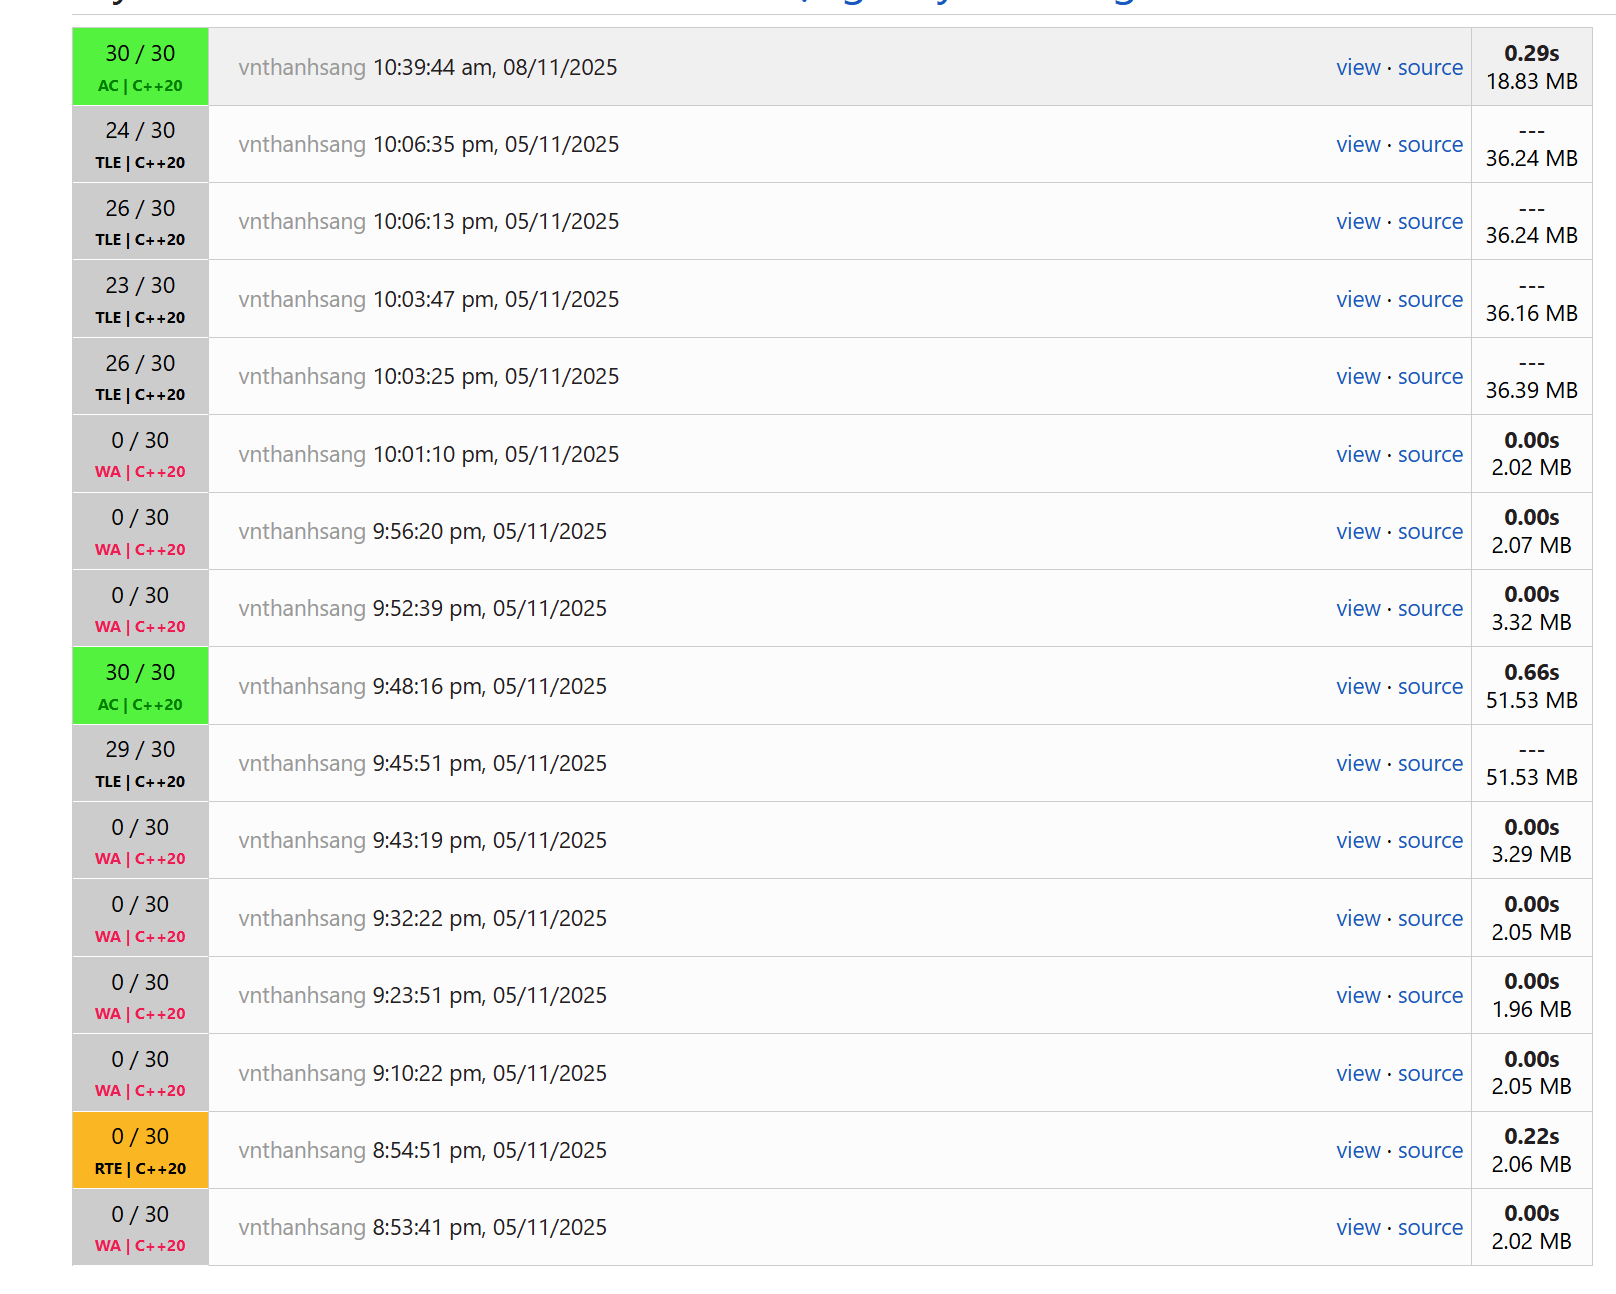

Ghi chú: Code nếu cài krushkal thông thường thì không thể đủ thời gian chạy xong trong khoảng thời gian 1 giây, submission của top 1 không hề hoàn toàn theo krushkal mà có những tối ưu riêng, code của em tuy chạy được testcase đầu nhưng không kịp cho các testcase lớn hơn (bonus)